In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [14, 6]
matplotlib.rcParams['axes.grid'] = True

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.version_info

import sys
sys.path.insert(0, '../')


import numpy as np
import matplotlib.pyplot as plt

from lib_data import *

import random

from tqdm.notebook import tqdm
from lib_lsh import *

In [3]:
load_workspace(vars(), filename='25shot_may18')

Loaded: mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, 


In [11]:
load_workspace(vars(), filename='20200619-172822-lsh-hardware-g-5-qs_hash')

Loaded: In, Out, mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, hash_planes, hash_key, y_true, y_preds, i, qq, yy, q_hash, distance, g, q, qs_input, rand_vecs, vec_pos, vec_neg, out_pos, out_neg, output, g_true, output_soft, output_soft2, c, lin_cor_lsh, output_cor, qs_hash_new, qs_hash, 


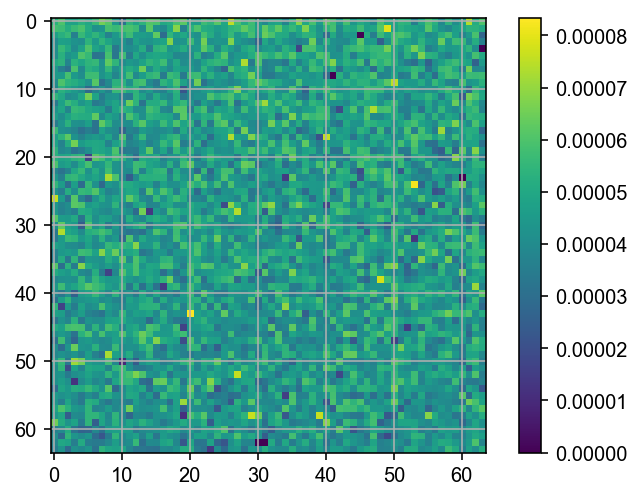

In [12]:
# g = dpe.read(0, method='slow')
plt.imshow(g)
plt.colorbar()

In [13]:
# hash_key = [get_lsh_g(k, g) for k in tqdm(mem_keys)]

# plt.imshow(np.array(hash_key))
# plt.colorbar()
# plt.grid(False)

In [14]:
y_true = []
y_preds= []

# qs_hash_new = []

for i, (q_hash, yy) in tqdm(enumerate(zip(qs_hash_new, y_new)), total=len(y_new)):
    if i==0:
        continue
        
#     q_hash = get_lsh_g(qq, g).reshape(-1)
    
#     qs_hash_new.append(q_hash)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.8947368421052632


In [16]:
y_true = []
y_preds= []

# qs_hash = []

for i, (q_hash, yy) in tqdm(enumerate(zip(qs_hash, y)), total=len(y)):
    if i<125:
        continue
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.8373333333333334


In [ ]:
hash_key

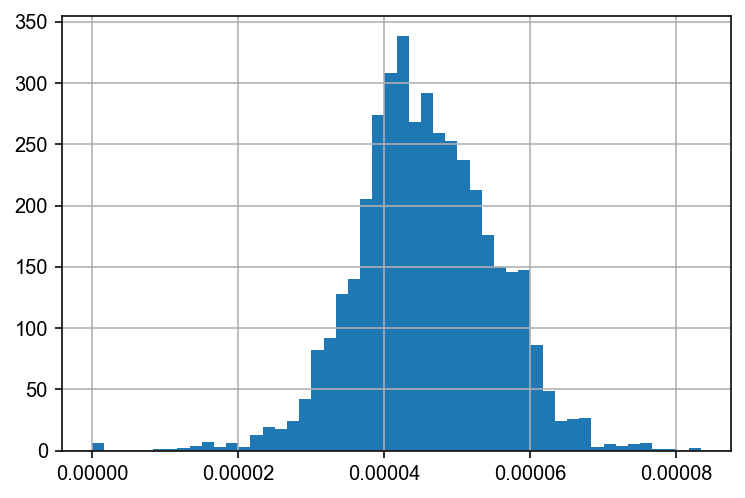

In [19]:
_ = plt.hist(g.reshape(-1), 50)

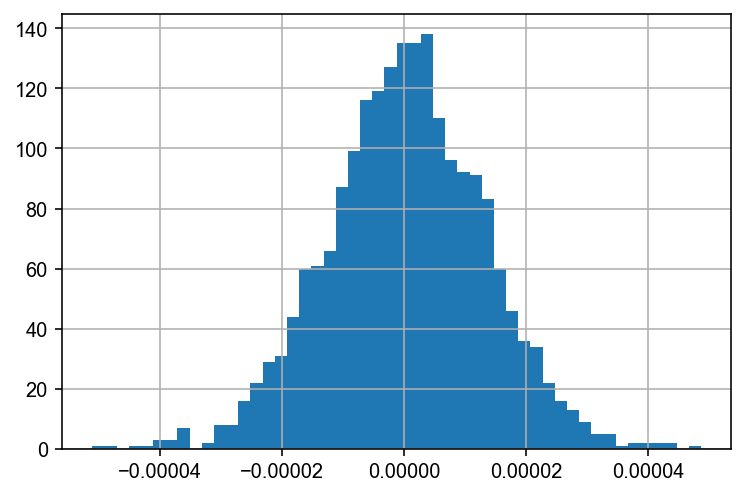

In [20]:
gdiff = g[:,::2] - g[:,1::2]

_ = plt.hist(gdiff.reshape(-1), 50)